In [2]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
midterm = pd.read_csv('finalproj/AllData.csv')

In [4]:
midterm

,Unnamed: 0,City,TotalDays2010,PoorDays2010,AQImedian2010,TotalDays2020,PoorDays2020,AQImedian2020,Zone,Poorday_Rate2010,Poorday_Rate2020
0,0,Seattle,365,3,41,306,14,42,west,3,16
1,1,San Francisco,365,14,48,314,22,45,west,14,25
2,2,Los Angeles,365,115,77,275,119,81,west,115,157
3,3,Denver,365,38,61,366,34,58,mountain,38,33
4,4,Salt Lake City,365,24,51,366,21,50,mountain,24,20
5,5,Phoenix,365,59,74,366,70,75,mountain,59,69
6,6,Chicago,365,43,71,366,28,56,central,43,27
7,7,St.Louis,365,103,74,366,10,52,central,103,9
8,8,Dallas,365,28,52,306,24,49,central,28,28
9,9,Boston,365,10,47,306,0,42,east,10,0


In [5]:
midterm['lon'] = [-122.33, -122.60, -118.23, -104.99, -111.89, -112.07, -87.63, -90.20, -96.80, -71.06, -77.04, -80.19, -122.63, -123.04, -107.88, -105.94, -83.75, -100.83, -68.77, -78.48]
midterm['lat'] = [47.61, 37.77, 34.05, 39.74, 40.76, 33.45, 41.88, 38.63, 32.78, 42.36, 38.91, 25.76, 38.96, 44.94, 37.28, 35.69, 42.28, 46.81, 44.80, 38.03]

In [6]:
midterm

,Unnamed: 0,City,TotalDays2010,PoorDays2010,AQImedian2010,TotalDays2020,PoorDays2020,AQImedian2020,Zone,Poorday_Rate2010,Poorday_Rate2020,lon,lat
0,0,Seattle,365,3,41,306,14,42,west,3,16,-122.33,47.61
1,1,San Francisco,365,14,48,314,22,45,west,14,25,-122.60,37.77
2,2,Los Angeles,365,115,77,275,119,81,west,115,157,-118.23,34.05
3,3,Denver,365,38,61,366,34,58,mountain,38,33,-104.99,39.74
4,4,Salt Lake City,365,24,51,366,21,50,mountain,24,20,-111.89,40.76
5,5,Phoenix,365,59,74,366,70,75,mountain,59,69,-112.07,33.45
6,6,Chicago,365,43,71,366,28,56,central,43,27,-87.63,41.88
7,7,St.Louis,365,103,74,366,10,52,central,103,9,-90.20,38.63
8,8,Dallas,365,28,52,306,24,49,central,28,28,-96.80,32.78
9,9,Boston,365,10,47,306,0,42,east,10,0,-71.06,42.36


In [8]:
cities = gp.GeoDataFrame(midterm,geometry = gp.points_from_xy(midterm.lon, midterm.lat))
cities

,Unnamed: 0,City,TotalDays2010,PoorDays2010,AQImedian2010,TotalDays2020,PoorDays2020,AQImedian2020,Zone,Poorday_Rate2010,Poorday_Rate2020,lon,lat,geometry
0,0,Seattle,365,3,41,306,14,42,west,3,16,-122.33,47.61,POINT (-122.33000 47.61000)
1,1,San Francisco,365,14,48,314,22,45,west,14,25,-122.60,37.77,POINT (-122.60000 37.77000)
2,2,Los Angeles,365,115,77,275,119,81,west,115,157,-118.23,34.05,POINT (-118.23000 34.05000)
3,3,Denver,365,38,61,366,34,58,mountain,38,33,-104.99,39.74,POINT (-104.99000 39.74000)
4,4,Salt Lake City,365,24,51,366,21,50,mountain,24,20,-111.89,40.76,POINT (-111.89000 40.76000)
5,5,Phoenix,365,59,74,366,70,75,mountain,59,69,-112.07,33.45,POINT (-112.07000 33.45000)
6,6,Chicago,365,43,71,366,28,56,central,43,27,-87.63,41.88,POINT (-87.63000 41.88000)
7,7,St.Louis,365,103,74,366,10,52,central,103,9,-90.20,38.63,POINT (-90.20000 38.63000)
8,8,Dallas,365,28,52,306,24,49,central,28,28,-96.80,32.78,POINT (-96.80000 32.78000)
9,9,Boston,365,10,47,306,0,42,east,10,0,-71.06,42.36,POINT (-71.06000 42.36000)


In [13]:
filepath = 'finalproj/states.shp'
states = gp.read_file(filepath)

In [14]:
states.crs

<Projected CRS: ESRI:102010>
Name: North_America_Equidistant_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Conic
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
states = states.to_crs('epsg:4326')

In [17]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

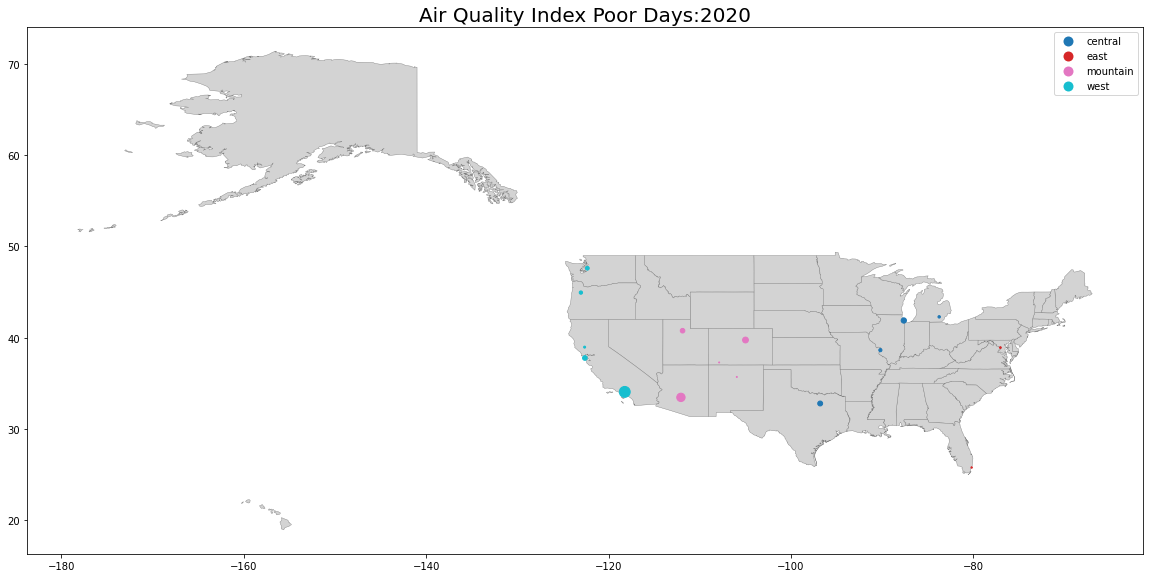

In [36]:
fig, ax=plt.subplots(figsize=(20,20))
states.plot(ax=ax, color = 'lightgray', edgecolor = 'gray', linewidth=0.4, legend = True)
cities.plot(column='Zone', ax=ax, markersize='PoorDays2020',alpha=1.0,categorical=False, legend=True)
ax.axis()
plt.title('Air Quality Index Poor Days:2020', size=20)
plt.savefig('finalproj/poordays2020.png')
#plt.axis())
#plt.show()
#some cities will not show up due to having zero poor days

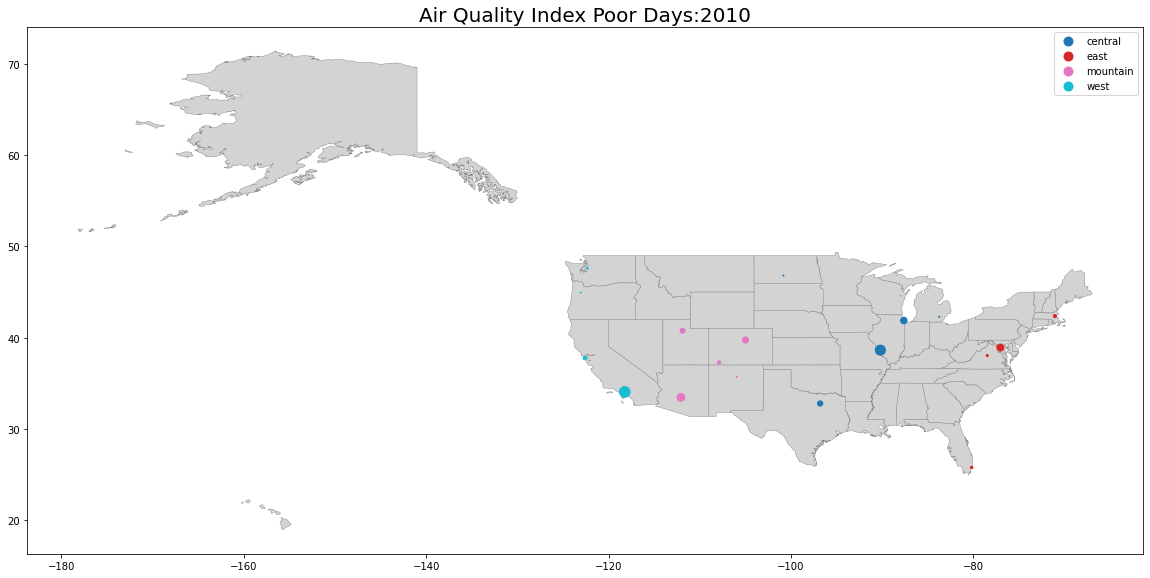

In [33]:
fig, ax=plt.subplots(figsize=(20,20))
states.plot(ax=ax, color = 'lightgray', edgecolor = 'gray', linewidth=0.4, legend = True)
cities.plot(column='Zone', ax=ax, markersize='PoorDays2010', alpha=1.0, categorical=False, legend=True)
ax.axis()
plt.title('Air Quality Index Poor Days:2010',size=20)
plt.savefig('finalproj/poordays2010.png')
#plt.axis()
#plt.show()

In [59]:
import folium
m = folium.Map(location=[34,-100], tiles='openstreetmap', zoom_start=3.4)
m

In [60]:
for i in range(0,len(cities)):
    folium.Circle(
    location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
    popup=cities.iloc[i]['City'],
    radius=float(cities.iloc[i]['PoorDays2020'])*2000,
    color='crimson',
    fill=True,
    fill_color='crimson'
    ).add_to(m)

m

In [61]:
m.save('finalproj/aqidata2020')

In [62]:
import folium
m = folium.Map(location=[34,-100], tiles='openstreetmap', zoom_start=3.4)
m

In [63]:
for i in range(0,len(cities)):
    folium.Circle(
    location=[cities.iloc[i]['lat'], cities.iloc[i]['lon']],
    popup=cities.iloc[i]['City'],
    radius=float(cities.iloc[i]['PoorDays2010'])*2000,
    color='crimson',
    fill=True,
    fill_color='crimson'
    ).add_to(m)
m

In [64]:
m.save('finalproj/aqidata2010')